## The Beatles' Lyrics -- Modeling Workbook

In [1]:
# Imports
import numpy as np
import pandas as pd


In [3]:
# Pickle load
df = pd.read_excel("data/beatles_data.xlsx")
df.head()

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics
0,"""12-Bar Original""",Anthology 2,John Lennon\n Paul McCartney\n George Harrison...,Instrumental,1965,NaN
1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...
2,"""All I've Got to Do""",UK: With the Beatles\n US: Meet the Beatles!,Lennon,Lennon,1963,Whenever I want you around yeh \nAll I gotta d...
3,"""All My Loving""",UK: With the Beatles\n US: Meet the Beatles!,McCartney,McCartney,1963,Close your eyes and I'll kiss you\nTomorrow I'...
4,"""All Things Must Pass""",Anthology 3,Harrison,Harrison,1969,"Sunrise doesn't last all morning, \nA cloudbur..."


### Data Overview

In [6]:
# Dataframe consisting of meta-data, lyrics, and NLP Features
df.head(3)

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyric Line,Number Words,Number Apostrophes,Cleaned Lyrics,NLP Features,Tokens,Lemmas,Lemmas Text
0,Across the Universe,Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,11,0,words are flowing out like endless rain into a...,"{'pos_counter': {'pos_NOUN': 4, 'pos_VERB': 2,...","[words, are, flowing, out, like, endless, rain...","[word, be, flow, out, like, endless, rain, int...",word be flow out like endless rain into a pape...
1,Across the Universe,Let It Be,Lennon,Lennon,1968,"They slither while they pass, they slip away a...",11,0,they slither while they pass they slip away ac...,"{'pos_counter': {'pos_PRON': 3, 'pos_VERB': 3,...","[they, slither, while, they, pass, they, slip,...","[-PRON-, slither, while, -PRON-, pass, -PRON-,...",-PRON- slither while -PRON- pass -PRON- slip a...
2,Across the Universe,Let It Be,Lennon,Lennon,1968,"Pools of sorrow, waves of joy are drifting thr...",12,0,pools of sorrow waves of joy are drifting thro...,"{'pos_counter': {'pos_NOUN': 5, 'pos_ADP': 3, ...","[pools, of, sorrow, waves, of, joy, are, drift...","[pool, of, sorrow, wave, of, joy, be, drift, t...",pool of sorrow wave of joy be drift through -P...


In [8]:
# Checking for class imbalance
df['Songwriter(s)'].value_counts()

Multiple Beatles    1927
Lennon              1629
McCartney           1488
Harrison             612
Starr                  8
Name: Songwriter(s), dtype: int64

In [6]:
# Which song was it?
df[df['Songwriter(s)'] == 'Starr']

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyric Line,Number Words,Number Apostrophes,Cleaned Lyrics,NLP Features,Tokens,Lemmas,Lemmas Text
4495,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,Taking a trip on an ocean liner,7,0,taking a trip on an ocean liner,"{'pos_counter': {'pos_VERB': 1, 'pos_DET': 2, ...","[taking, a, trip, on, an, ocean, liner]","[take, a, trip, on, an, ocean, liner]",take a trip on an ocean liner
4496,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,I'm gonna get to Carolina,5,1,i'm gonna get to carolina,"{'pos_counter': {'pos_PRON': 1, 'pos_VERB': 3,...","[i, 'm, gon, na, get, to, carolina]","[-PRON-, be, go, to, get, to, carolina]",-PRON- be go to get to carolina
4497,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,Taking a trip on an ocean liner,7,0,taking a trip on an ocean liner,"{'pos_counter': {'pos_VERB': 1, 'pos_DET': 2, ...","[taking, a, trip, on, an, ocean, liner]","[take, a, trip, on, an, ocean, liner]",take a trip on an ocean liner
4498,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,I'm gonna get to Carolina,5,1,i'm gonna get to carolina,"{'pos_counter': {'pos_PRON': 1, 'pos_VERB': 3,...","[i, 'm, gon, na, get, to, carolina]","[-PRON-, be, go, to, get, to, carolina]",-PRON- be go to get to carolina
4499,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,Taking a trip on an ocean liner,7,0,taking a trip on an ocean liner,"{'pos_counter': {'pos_VERB': 1, 'pos_DET': 2, ...","[taking, a, trip, on, an, ocean, liner]","[take, a, trip, on, an, ocean, liner]",take a trip on an ocean liner
4500,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,I'm gonna get to Carolina,5,1,i'm gonna get to carolina,"{'pos_counter': {'pos_PRON': 1, 'pos_VERB': 3,...","[i, 'm, gon, na, get, to, carolina]","[-PRON-, be, go, to, get, to, carolina]",-PRON- be go to get to carolina
4501,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,Taking a trip on an ocean liner,7,0,taking a trip on an ocean liner,"{'pos_counter': {'pos_VERB': 1, 'pos_DET': 2, ...","[taking, a, trip, on, an, ocean, liner]","[take, a, trip, on, an, ocean, liner]",take a trip on an ocean liner
4502,Taking a Trip to Carolina,Let It Be... Naked - Fly on the Wall bonus disc,Starr,Starr,1969,I'm gonna get to Carolina,5,1,i'm gonna get to carolina,"{'pos_counter': {'pos_PRON': 1, 'pos_VERB': 3,...","[i, 'm, gon, na, get, to, carolina]","[-PRON-, be, go, to, get, to, carolina]",-PRON- be go to get to carolina


### Dropping 'Ringo Starr'

Since Ringo Starr only composed 1 song, this class is extremely imbalanced. Let's drop him from the data.

In [7]:
# Drop Ringo Starr
df = df.drop(4494)
df = df.drop(4495)
df = df.drop(4496)
df = df.drop(4497)
df = df.drop(4498)
df = df.drop(4499)
df = df.drop(4500)
df = df.drop(4501)
df = df.drop(4502)
df_spacy = df_spacy.drop(4494)
df_spacy = df_spacy.drop(4495)
df_spacy = df_spacy.drop(4496)
df_spacy = df_spacy.drop(4497)
df_spacy = df_spacy.drop(4498)
df_spacy = df_spacy.drop(4499)
df_spacy = df_spacy.drop(4500)
df_spacy = df_spacy.drop(4501)
df_spacy = df_spacy.drop(4502)

# Reset the row indeces at 0
df = df.reset_index(drop=True)
df_spacy = df_spacy.reset_index(drop=True)

# Confirm classes are balnaced
df['Songwriter(s)'].value_counts()

Multiple Beatles    1927
Lennon              1628
McCartney           1488
Harrison             612
Name: Songwriter(s), dtype: int64

### Bag of Words (BoW)

In [17]:
# Imports
import itertools
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
# Define X and y
y = df['Songwriter(s)']
X = df['Lemmas Text']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 444)

# Vocabulary of lemmas, use with CountVectorizer
vocabulary = set(itertools.chain.from_iterable(df['Lemmas']))

# Count vectorizer and the index-to-word mapping
count_vectorizer = CountVectorizer(vocabulary=vocabulary)

# Create bag-of-word embeddings using vectorizer
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Convert to a pandas dataframe
X_train_counts = pd.DataFrame(X_train_counts.todense())
X_test_counts = pd.DataFrame(X_test_counts.todense())

# Create a mapping from index-to-word for the bag of words
index_to_word = {v:k for k,v in count_vectorizer.vocabulary_.items()}

### LSA : BoW Embedding

Now that we've created embeddings, let's visualize them and see if we can identify some structure. In a perfect world, our embeddings would be so distinct that the classes would be perfectly separated.

In [19]:
# Imports 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder

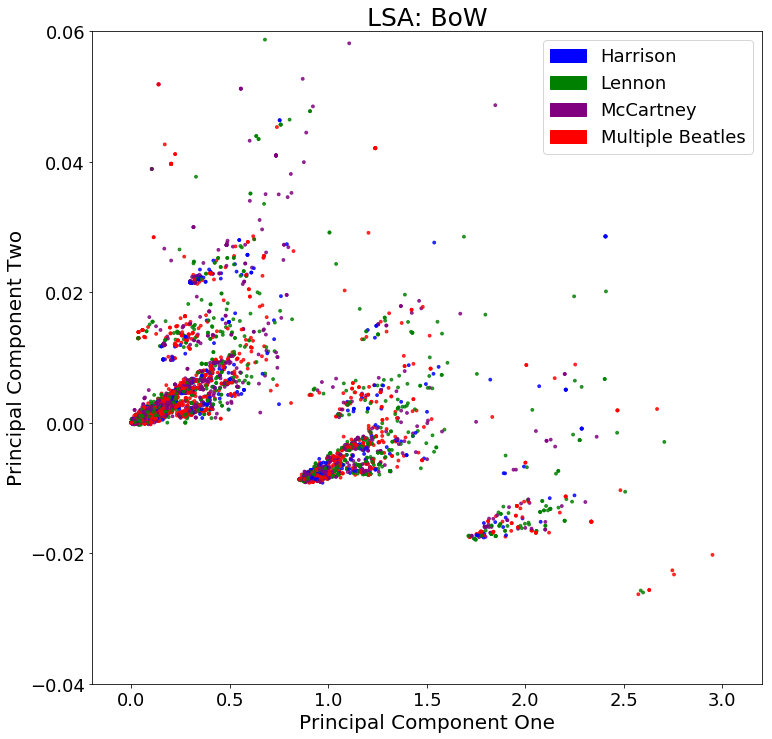

In [25]:
# Label encoder
le = LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)

def plot_LSA(test_data, test_labels, plot=True):
    """
    This function first uses SK-Learn's truncated SVD (LSA) class to 
    transform the high dimensionality (number of columns) of the BoW 
    embedding down to 2 dimensions. Then the two dimensions are used
    to plot each song, colored by the song writer (class).
    
    Args:
        test_data (pd.DataFrame): BoW embeddings.
        test_labels (pd.Series): In this case the songwriter of each
        Beatles' song.
        plot (boolean): Whether or not to plot. Defaults to True.
    
    Returns:
        None.
    """
    
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['blue','green','purple', 'red']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        blue_patch = mpatches.Patch(color='blue', label='Harrison')
        green_patch = mpatches.Patch(color='green', label='Lennon')
        purple_patch = mpatches.Patch(color='purple', label='McCartney')
        orange_patch = mpatches.Patch(color='red', label='Multiple Beatles')
        plt.legend(handles=[blue_patch, green_patch, purple_patch, orange_patch], prop={'size': 18})
        plt.xlabel('Principal Component One')
        plt.ylabel('Principal Component Two')
        plt.rcParams["xtick.labelsize"] = 20
        plt.rcParams["ytick.labelsize"] = 20


# Run LSA on BoW embeddings and plot it
fig = plt.figure(figsize=(12, 12))
plot_LSA(X_train_counts, y_train_encoded)
plt.title('LSA: BoW', fontsize = 25)
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["axes.labelsize"] = 20
plt.xlim(-0.2, 3.2)
plt.ylim(-0.04, 0.06)
plt.savefig("images/lines_lsa_bow.png")
plt.show()

### LSA : BoW Embedding + TFIDF

The data doesn't seem to be too well seperated... Not a huge surprise. Let's try adding a term frequency-inverse document frequency (TF-IDF) transformation to the BoW embedding. The TF-IDF weight is a staticial measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. TF-IDF can be successfuly used for stop-words filtering in various subjects including text summarization and classification!

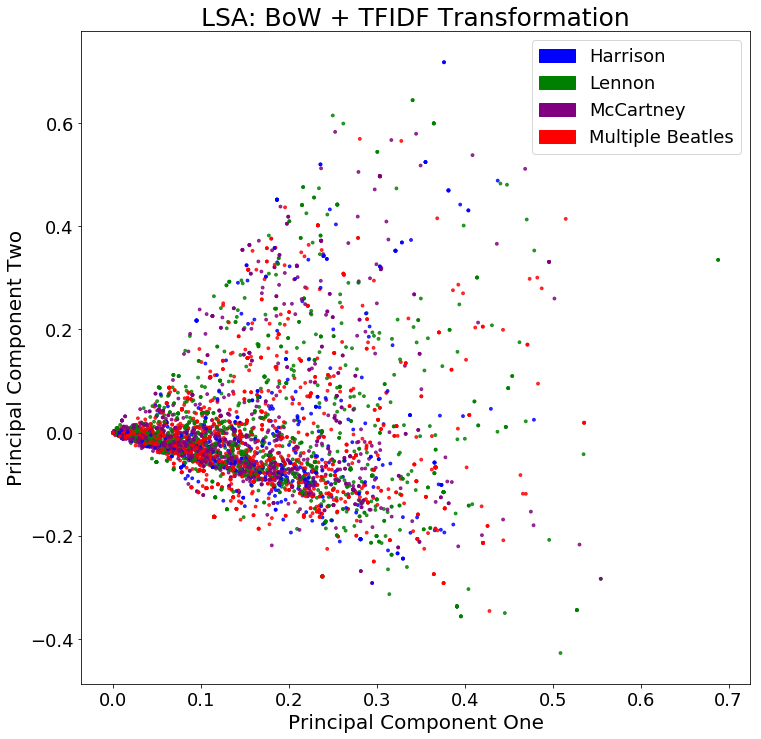

In [14]:
# Define X and y
y = df['Songwriter(s)']
X = df['Lemmas Text']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 444)

# Vocabulary of Lemmas, use with CountVectorizer
vocabulary = set(itertools.chain.from_iterable(df['Lemmas']))

# Count vectorizer and the index-to-word mapping
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)

# Create bag-of-word embeddings using vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert to a pandas dataframe
X_train_tfidf = pd.DataFrame(X_train_tfidf.todense())
X_test_tfidf = pd.DataFrame(X_test_tfidf.todense())

# Create a mapping from index-to-word for the bag of words
index_to_word = {v:k for k,v in count_vectorizer.vocabulary_.items()}

# Run LSA on BoW embeddings and plot it
fig = plt.figure(figsize=(12, 12))
plot_LSA(X_train_tfidf, y_train_encoded)
plt.title('LSA: BoW + TFIDF Transformation', fontsize = 25)
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["axes.labelsize"] = 20
plt.savefig("images/lines_lsa_bow_tfidf.png")
plt.show()

**Summary:**
- BoW, BoW + TF-IDF, and Spacy NLP Features don't seem to be able to seperate out the songwriters (at least visually).
- Let's try some different machine learning models and see what happens.

### Classification Modeling

- Using cleaned, but non-lemmatized lyrics to start.
- Simple Bag of Words (BoW).
- Grid searching across different hyper-parameters for each classifier.

In [46]:
# Imports
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [47]:
# Define X and y
y = df['Songwriter(s)']
X = df['Cleaned Lyrics']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 13)

# Vocabulary of Lemmas, use with CountVectorizer
vocabulary = set(itertools.chain.from_iterable(df['Cleaned Lyrics']))

# Count vectorizer and the index-to-word mapping
count_vectorizer = CountVectorizer(vocabulary=vocabulary)

In [48]:
# LOGISTIC REGRESSION GRID SEARCH PIPELINE
from sklearn.linear_model import LogisticRegression

# Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),])

# Parameter Grid
param_grid = {
        'vect__max_df': (0.05, 0.075, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1.0),
        'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
        'vect__stop_words' : (None, 'english'),
        'tfidf__use_idf': (True, False),
        'tfidf__norm': ('l1', 'l2'),
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the GridSearchCV object
grid = GridSearchCV(pipeline, cv=10, n_jobs=-1, param_grid=param_grid, scoring=make_scorer(accuracy_score))

# Run the grid search 
grid.fit(X_train, y_train)

# Predicts usings the best parameters of the grid search
y_pred = grid.predict(X_test)

# Accuracy Score
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))
print()

# Classification Report
print(classification_report(y_test, y_pred, digits=3))
print()

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()

# Best parameters from the grid search
print('Best parameters set found on development set:')
print(grid.best_params_)
print()

Accuracy Score:
0.7736516357206012

                  precision    recall  f1-score   support

        Harrison      0.698     0.597     0.643       124
          Lennon      0.793     0.784     0.789       333
       McCartney      0.762     0.784     0.773       282
Multiple Beatles      0.786     0.814     0.799       392

     avg / total      0.772     0.774     0.772      1131


Confusion Matrix:
[[ 74   9  16  25]
 [ 11 261  24  37]
 [ 11  25 221  25]
 [ 10  34  29 319]]

Best parameters set found on development set:
{'clf__C': 1000, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__max_df': 0.15, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}



In [18]:
def get_most_important_features(vectorizer, model, n=5):
    """
    This function is used to find the most important ngrams (words) 
    for classifying each class (songwriter).
    
    Args:
        vectorizer (sklearn.feature_extraction.text.CountVectorizer):
        The vectorizer used to create the Bag of Words space matrix.
        model (sklearn.linear_model.logistic.LogisticRegression):
        The LR model trained on the dataset.
        n (int): Number of top words to return.
    
    Returns:
        important_words (dict): Dicitionary containing the most
        critical words used to predict each songwriter class.
    """
    
    # Create a mapping dictionary from words to index
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    important_words = {}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        important_words[class_index] = {'tops':tops, 'bottom':bottom}
    
    return important_words


# Vectorize
vectorizer = CountVectorizer(max_df = 0.15, ngram_range = (1, 3), stop_words = None)
X_train_counts = vectorizer.fit_transform(X_train).todense()
X_test_counts = vectorizer.transform(X_test).todense()

# Tfidf transformation
tfidf = TfidfTransformer(norm = 'l1', use_idf = True)
X_train_counts_tfidf = tfidf.fit_transform(X_train_counts).todense()
X_test_counts_tfidf = tfidf.fit_transform(X_test_counts).todense()

# NB
clf = LogisticRegression(C = 1000)
clf.fit(X_train_counts_tfidf, y_train)

# Create predictions, using trained model
y_pred = clf.predict(X_test_counts_tfidf)

# Find the most important words used for classification
importance = get_most_important_features(vectorizer, clf, 10)

# Re-name the dictionary keys
importance['Harrison'] = importance.pop(0)
importance['Lennon'] = importance.pop(1)
importance['McCartney'] = importance.pop(2)
importance['Multiple Beatles'] = importance.pop(3)

# Print the most important words
importance

{'Harrison': {'bottom': [(-13.921410483033446, 'sun king'),
   (-13.921410483033446, 'the sun king'),
   (-14.262599284459437, 'down'),
   (-14.494688768811502, 'her'),
   (-14.548506753802553, 'better'),
   (-14.58601256869819, 'man'),
   (-15.459678290800278, 'ah ah ah'),
   (-15.461709285616719, 'yeah'),
   (-15.632243060291385, 'but it'),
   (-18.869472690989845, 'he')],
  'tops': [(19.326961156633253, 'make love'),
   (20.821179303503666, 'too'),
   (21.427031029922887, 'really'),
   (21.647170434274756, 'where you'),
   (21.71110203173196, 'those'),
   (22.055228145174933, 'too much'),
   (22.786912906814212, 'ah ah'),
   (22.916081813842617, 'baby in love'),
   (25.82354527718553, 'without'),
   (27.36887753382141, 'me mine')]},
 'Lennon': {'bottom': [(-15.926699244311594, 'oh no'),
   (-16.106147079584197, 'where'),
   (-16.81496185656539, 'long'),
   (-16.905976993414406, 'to you'),
   (-17.26853643622943, 'ooh ooh ooh'),
   (-17.864952905795, 'your'),
   (-17.997938571483626,

In [19]:
# K-NEAREST NEIGHBORS GRID SEARCH
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier()),])

# Which parameters to try every combination off in the grid-search, best combo wins
param_grid = {
        'vect__max_df': (0.05, 0.075, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1.0),
        'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
        'vect__stop_words' : (None, 'english'),
        'tfidf__use_idf': (True, False),
        'tfidf__norm': ('l1', 'l2'),
        'clf__n_neighbors': list(range(1,5))}

# Create the GridSearchCV object
grid = GridSearchCV(pipeline, cv=10, n_jobs=-1, param_grid=param_grid, scoring=make_scorer(accuracy_score))

# Run the grid search 
grid.fit(X_train, y_train)

# Predicts usings the best parameters of the grid search
y_pred = grid.predict(X_test)

# Accuracy Score
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))
print()

# Classification Report
print(classification_report(y_test, y_pred, digits=3))
print()

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()

# Best parameters from the grid search
print('Best parameters set found on development set:')
print(grid.best_params_)
print()

Accuracy Score:
0.770999115826702

                  precision    recall  f1-score   support

        Harrison      0.780     0.573     0.660       124
          Lennon      0.901     0.736     0.810       333
       McCartney      0.880     0.702     0.781       282
Multiple Beatles      0.659     0.913     0.766       392

     avg / total      0.799     0.771     0.771      1131


Confusion Matrix:
[[ 71   4   8  41]
 [  4 245  11  73]
 [  8   5 198  71]
 [  8  18   8 358]]

Best parameters set found on development set:
{'clf__n_neighbors': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__max_df': 0.15, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}



In [20]:
# MULTINOMIAL NAIVE BAYES GRID SEARCH PIPELINE
from sklearn.naive_bayes import MultinomialNB

# Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())])

# Parameter Grid
param_grid = {
        'vect__max_df': (0.05, 0.075, 0.1, 0.15, 0.20, 0.25, 0.5, 0.75, 1.0),
        'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
        'vect__stop_words' : (None, 'english'),
        'tfidf__use_idf': (True, False),
        'tfidf__norm': ('l1', 'l2'),
        'clf__alpha': (0, 0.001, 0.01, 0.1, 0.2, 0.25, 0.5, 0.75, 1.0)}

# Create the GridSearchCV object
grid = GridSearchCV(pipeline, cv=10, n_jobs=-1, param_grid=param_grid, scoring=make_scorer(accuracy_score))

# Run the grid search 
grid.fit(X_train, y_train)

# Predict usings the best parameters of the grid search
y_pred = grid.predict(X_test)

# Accuracy Score
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))
print()

# Classification Report
print(classification_report(y_test, y_pred, digits=3))
print()

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()

# Best parameters from the grid search
print('Best parameters set found on development set:')
print(grid.best_params_)
print()

Accuracy Score:
0.7860300618921309

                  precision    recall  f1-score   support

        Harrison      0.745     0.565     0.642       124
          Lennon      0.797     0.790     0.793       333
       McCartney      0.787     0.801     0.794       282
Multiple Beatles      0.786     0.842     0.813       392

     avg / total      0.785     0.786     0.784      1131


Confusion Matrix:
[[ 70  19  13  22]
 [  8 263  21  41]
 [  8  21 226  27]
 [  8  27  27 330]]

Best parameters set found on development set:
{'clf__alpha': 0, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__max_df': 0.15, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}



C:\Users\owent\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Spacy NLP Features

In [38]:
# Define X and y
y = df['Songwriter(s)']
X = df_spacy

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 13)

# Vocabulary of Lemmas, use with CountVectorizer
vocabulary = set(itertools.chain.from_iterable(df['Cleaned Lyrics']))

# Count vectorizer and the index-to-word mapping
count_vectorizer = CountVectorizer(vocabulary=vocabulary)

In [41]:
# LOGISTIC REGRESSION GRID SEARCH PIPELINE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pipeline
pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression())])

# Parameter Grid
param_grid = {
        'scale__with_mean': [True, False],
        'scale__with_std': [True, False],
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the GridSearchCV object
grid = GridSearchCV(pipeline, cv=10, n_jobs=-1, param_grid=param_grid, scoring=make_scorer(accuracy_score))

# Run the grid search 
grid.fit(X_train, y_train)

# Predicts usings the best parameters of the grid search
y_pred = grid.predict(X_test)

# Accuracy Score
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))
print()

# Classification Report
print(classification_report(y_test, y_pred, digits=3))
print()

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()

# Best parameters from the grid search
print('Best parameters set found on development set:')
print(grid.best_params_)
print()

Accuracy Score:
0.41114058355437666

                  precision    recall  f1-score   support

        Harrison      0.368     0.056     0.098       124
          Lennon      0.441     0.390     0.414       333
       McCartney      0.386     0.365     0.375       282
Multiple Beatles      0.409     0.574     0.478       392

     avg / total      0.408     0.411     0.392      1131


Confusion Matrix:
[[  7  30  29  58]
 [  5 130  61 137]
 [  3  46 103 130]
 [  4  89  74 225]]

Best parameters set found on development set:
{'clf__C': 1000, 'scale__with_mean': True, 'scale__with_std': False}

